## @uthor : Sayandeep Maity

### Dated : 24 JUNE 2022

#### Last edited : 24 JUNE 2022

### Import Libraries

In [1]:
###Import dataframe library###
import numpy as np
import pandas as pd

###import graphical library###
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


###import Machine Learning Library###
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics


### Read the dataset

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Renaming the column of Dataset

In [4]:
df.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']

In [5]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Finding the unique species of Iris

In [7]:
spc = df.Species.unique()
print(spc)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Vizualizing the Iris Dataset

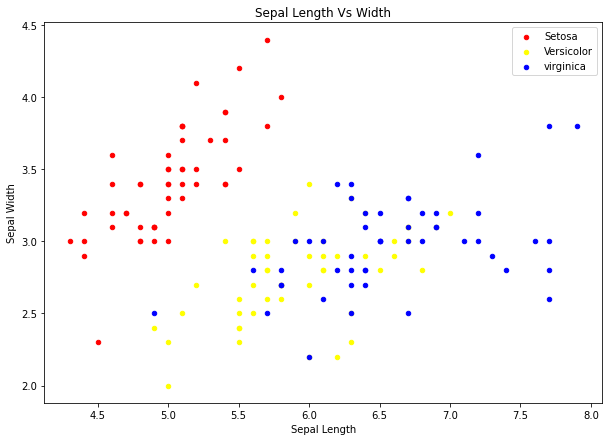

In [8]:
fig = df[df.Species == 'Iris-setosa'].plot(kind = 'scatter', x= 'SepalLength', y = 'SepalWidth', color = 'red', label = "Setosa")
df[df.Species == 'Iris-versicolor'].plot(kind = 'scatter', x= 'SepalLength', y = 'SepalWidth', color = 'yellow', label = "Versicolor", ax= fig)
df[df.Species == 'Iris-virginica'].plot(kind = 'scatter', x= 'SepalLength', y = 'SepalWidth', color = 'blue', label = "virginica", ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

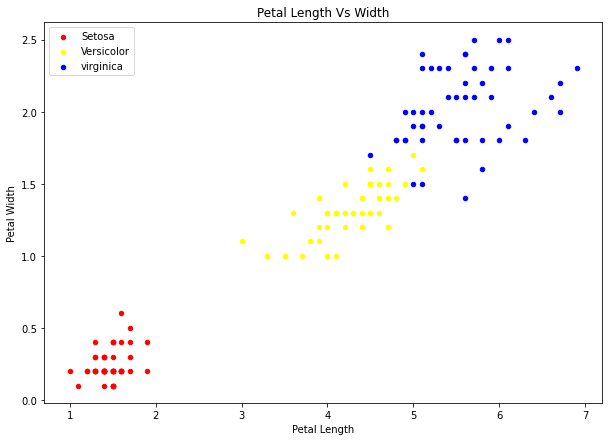

In [9]:
fig = df[df.Species == 'Iris-setosa'].plot(kind = 'scatter', x= 'PetalLength', y = 'PetalWidth', color = 'red', label = "Setosa")
df[df.Species == 'Iris-versicolor'].plot(kind = 'scatter', x= 'PetalLength', y = 'PetalWidth', color = 'yellow', label = "Versicolor", ax= fig)
df[df.Species == 'Iris-virginica'].plot(kind = 'scatter', x= 'PetalLength', y = 'PetalWidth', color = 'blue', label = "virginica", ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

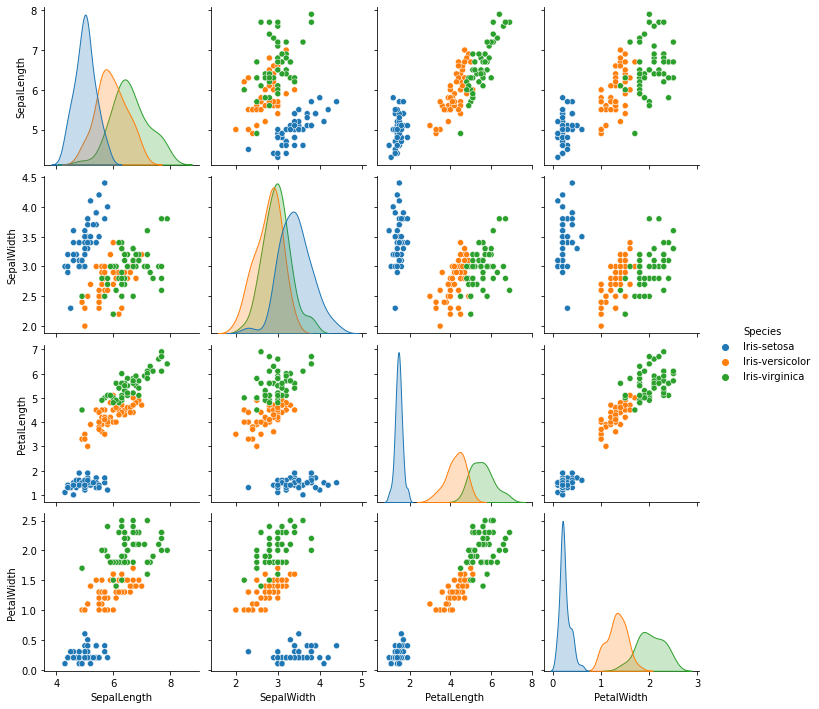

In [10]:
sns.pairplot(df, diag_kind='kde', hue = 'Species')

### The Model

In [11]:
train, test = train_test_split(df, test_size=0.3)

In [12]:
train_X = train[['SepalLength','SepalWidth','PetalLength','PetalWidth']] 
train_y = train.Species

test_X = test[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
test_y = test.Species 

### The Support Vector Machine

In [13]:
model1 = svm.SVC()
model1.fit(train_X,train_y)
prediction1 = model1.predict(test_X)
print('The accuracy of SVM :', round(metrics.accuracy_score(prediction1, test_y)*100,2))

The accuracy of SVM : 97.78


### The K-Nearnest Neigbhour

In [14]:
model2 = KNeighborsClassifier(n_neighbors= 10)
model2.fit(train_X, train_y)
prediction2 = model2.predict(test_X)
print('The accuracy of KNN is :', round(metrics.accuracy_score(prediction2,test_y)*100,2))

The accuracy of KNN is : 95.56


### 2nd Model

In [15]:
df_petal = df[['PetalLength','PetalWidth','Species']]
df_sepal = df[['SepalLength', 'SepalWidth', 'Species']]

In [16]:
train_p, test_p = train_test_split(df_petal, test_size = 0.3)
train_s, test_s = train_test_split(df_sepal, test_size = 0.3)

In [17]:
train_X_p = train_p[['PetalLength','PetalWidth']]
train_y_p = train_p.Species

test_X_p = test_p[['PetalLength','PetalWidth']]
test_y_p = test_p.Species

train_X_s = train_s[['SepalLength', 'SepalWidth']]
train_y_s = train_s.Species

test_X_s = test_s[['SepalLength', 'SepalWidth']]
test_y_s = test_s.Species

### Model_petal using SVM

In [18]:
model1_p = svm.SVC()
model1_p.fit(train_X_p,train_y_p)
prediction1_p = model1_p.predict(test_X_p)
print('The accuracy using petal SVM :', round(metrics.accuracy_score(prediction1_p,test_y_p)*100,2))

The accuracy using petal SVM : 95.56


### Model_sepal using SVM

In [19]:
model1_s = svm.SVC()
model1_s.fit(train_X_s,train_y_s)
prediction1_s = model1_s.predict(test_X_s)
print('The accuracy using sepal SVM :', round(metrics.accuracy_score(prediction1_s,test_y_s)*100,2))

The accuracy using sepal SVM : 82.22


### Model_petal using KNN

In [20]:
model2_p = KNeighborsClassifier(n_neighbors=10)
model2_p.fit(train_X_p,train_y_p)
prediction2_p = model2_p.predict(test_X_p)
print('The accuracy using Petal KNN :', round(metrics.accuracy_score(prediction2_p,test_y_p)*100,2))

The accuracy using Petal KNN : 97.78


### Model_sepal using KNN

In [21]:
model2_s = KNeighborsClassifier(n_neighbors=5)
model2_s.fit(train_X_s,train_y_s)
prediction2_s = model2_s.predict(test_X_s)
print('The accuracy using Sepal KNN :', round(metrics.accuracy_score(prediction2_s, test_y_s)*100,2))

The accuracy using Sepal KNN : 75.56


### Accuracy check of K-neighbors

In [22]:
def accuracy_knn(t_X,t_y,tst_X,tst_y):
    a_index = list(range(1,21))
    a = pd.Series()
    for i in list(range(1,21)):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(t_X, t_y)
        prediction = model.predict(tst_X)
        a = a.append(pd.Series(metrics.accuracy_score(prediction, tst_y)))
    plt.plot(a_index, a)
    x = [i for i in range(1,21)]
    plt.xticks(x)
    plt.title('KNN- accuracy')
    plt.xlabel('n_neighbors')
    plt.ylabel('accuracy')
    plt.tight_layout()
    plt.show()

<ipython-input-22-6ecddff669a7>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


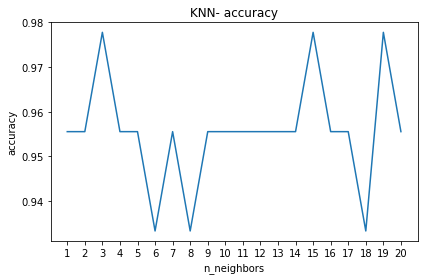

In [23]:
#### Normal model ###
accuracy_knn(train_X,train_y,test_X,test_y)

<ipython-input-22-6ecddff669a7>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


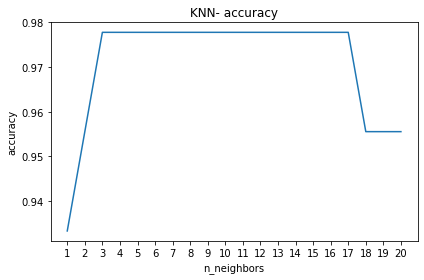

In [24]:
### Model_petal ###

accuracy_knn(train_X_p,train_y_p,test_X_p,test_y_p)

<ipython-input-22-6ecddff669a7>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


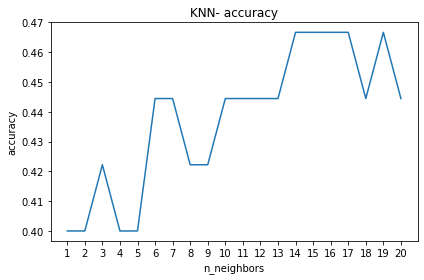

In [25]:
### Model_sepal ###

accuracy_knn(train_X_s,train_y_p,test_X_p,test_y_s)

### Classification Report & Confusion Matrix 

In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       # print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

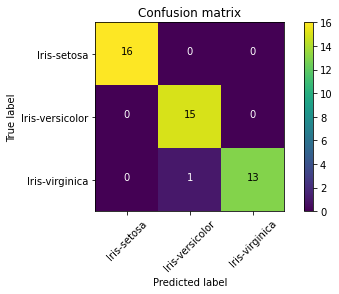

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [27]:
#### Normal Model SVM ####

cm_SVM = metrics.confusion_matrix( prediction1,test_y)
plot_confusion_matrix(cm_SVM,spc)
print(metrics.classification_report(prediction1,test_y))

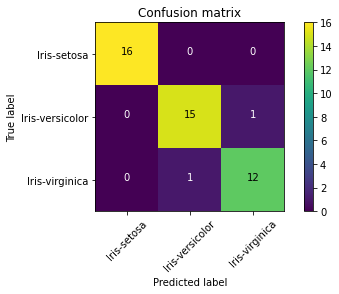

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [28]:
### Normal Model KNN ###

cm_KNN = metrics.confusion_matrix( prediction2,test_y)
plot_confusion_matrix(cm_KNN,spc)
print(metrics.classification_report(prediction2,test_y))

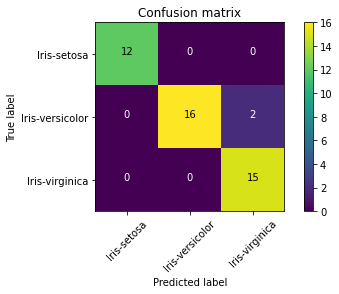

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [29]:
### Model_petal_SVM ###

cm_SVM_p = metrics.confusion_matrix( prediction1_p,test_y_p)
plot_confusion_matrix(cm_SVM_p,spc)
print(metrics.classification_report(prediction1_p,test_y_p))

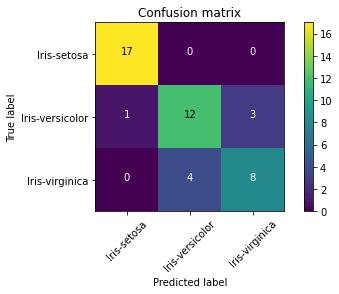

                 precision    recall  f1-score   support

    Iris-setosa       0.94      1.00      0.97        17
Iris-versicolor       0.75      0.75      0.75        16
 Iris-virginica       0.73      0.67      0.70        12

       accuracy                           0.82        45
      macro avg       0.81      0.81      0.81        45
   weighted avg       0.82      0.82      0.82        45



In [30]:
### Model_Sepal_SVM ###

cm_SVM_s = metrics.confusion_matrix( prediction1_s,test_y_s)
plot_confusion_matrix(cm_SVM_s,spc)
print(metrics.classification_report(prediction1_s,test_y_s))

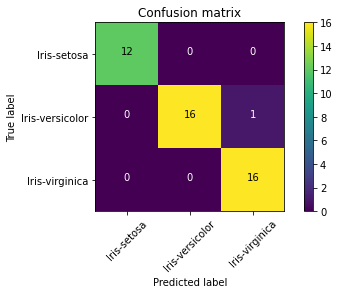

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [31]:
### Model_Petal_KNN ###

cm_KNN_p = metrics.confusion_matrix( prediction2_p,test_y_p)
plot_confusion_matrix(cm_KNN_p,spc)
print(metrics.classification_report(prediction2_p,test_y_p))

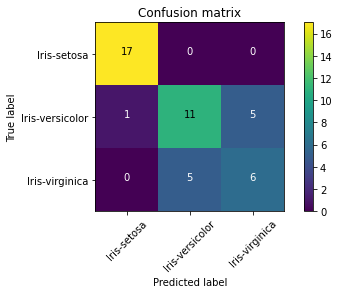

                 precision    recall  f1-score   support

    Iris-setosa       0.94      1.00      0.97        17
Iris-versicolor       0.69      0.65      0.67        17
 Iris-virginica       0.55      0.55      0.55        11

       accuracy                           0.76        45
      macro avg       0.73      0.73      0.73        45
   weighted avg       0.75      0.76      0.75        45



In [32]:
### Model_Sepal_KNN ###

cm_KNN_s = metrics.confusion_matrix( prediction2_s,test_y_s)
plot_confusion_matrix(cm_KNN_s,spc)
print(metrics.classification_report(prediction2_s,test_y_s))

### Comparision for best model

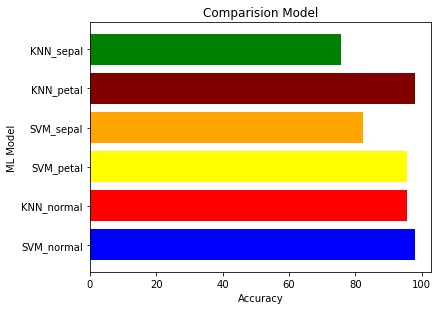

In [39]:
accuracy_SVM_normal = metrics.accuracy_score(prediction1,test_y)*100
accuracy_KNN_normal = metrics.accuracy_score(prediction2,test_y)*100
accuracy_SVM_petal = metrics.accuracy_score(prediction1_p,test_y_p)*100
accuracy_SVM_sepal = metrics.accuracy_score(prediction1_s,test_y_s)*100
accuracy_KNN_petal = metrics.accuracy_score(prediction2_p,test_y_p)*100
accuracy_KNN_sepal = metrics.accuracy_score(prediction2_s,test_y_s)*100

accuracy_dict = {'SVM_normal':accuracy_SVM_normal,'KNN_normal':accuracy_KNN_normal,
                 'SVM_petal':accuracy_SVM_petal,'SVM_sepal':accuracy_SVM_sepal,
                 'KNN_petal':accuracy_KNN_petal, 'KNN_sepal':accuracy_KNN_sepal
                }


accuracy_name = list(accuracy_dict.keys())
accuracy_value = list(accuracy_dict.values())

plt.barh(accuracy_name,accuracy_value,color = ['blue','red','yellow','orange','maroon','green'],)
plt.tight_layout()
plt.title('Comparision Model')
plt.ylabel('ML Model')
plt.xlabel('Accuracy')
plt.show()